In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]
df = pd.read_csv(url, header=None, names=column_names, na_values='?')

# Display the first 5 rows and basic info
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset Information:")
df.info()

First 5 rows of the dataset:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       2  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   t

In [6]:
# Check for missing values
print("\nMissing values before handling:")
print(df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)

print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values before handling:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

Missing values after handling:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


C:\Users\youss\AppData\Local\Temp\ipykernel_9436\804445768.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='viridis')


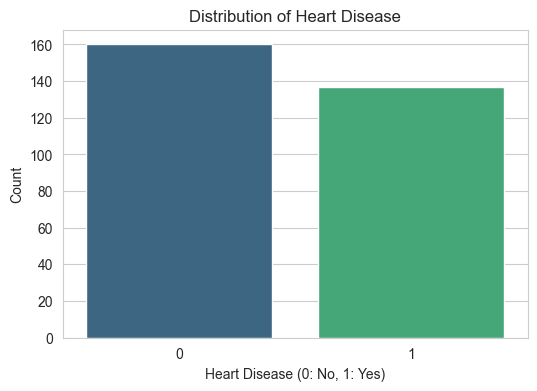

In [7]:
# Convert target to binary (0 = no disease, 1 = disease)
df['target'] = (df['target'] > 0).astype(int)

# Plot target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df, palette='viridis')
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

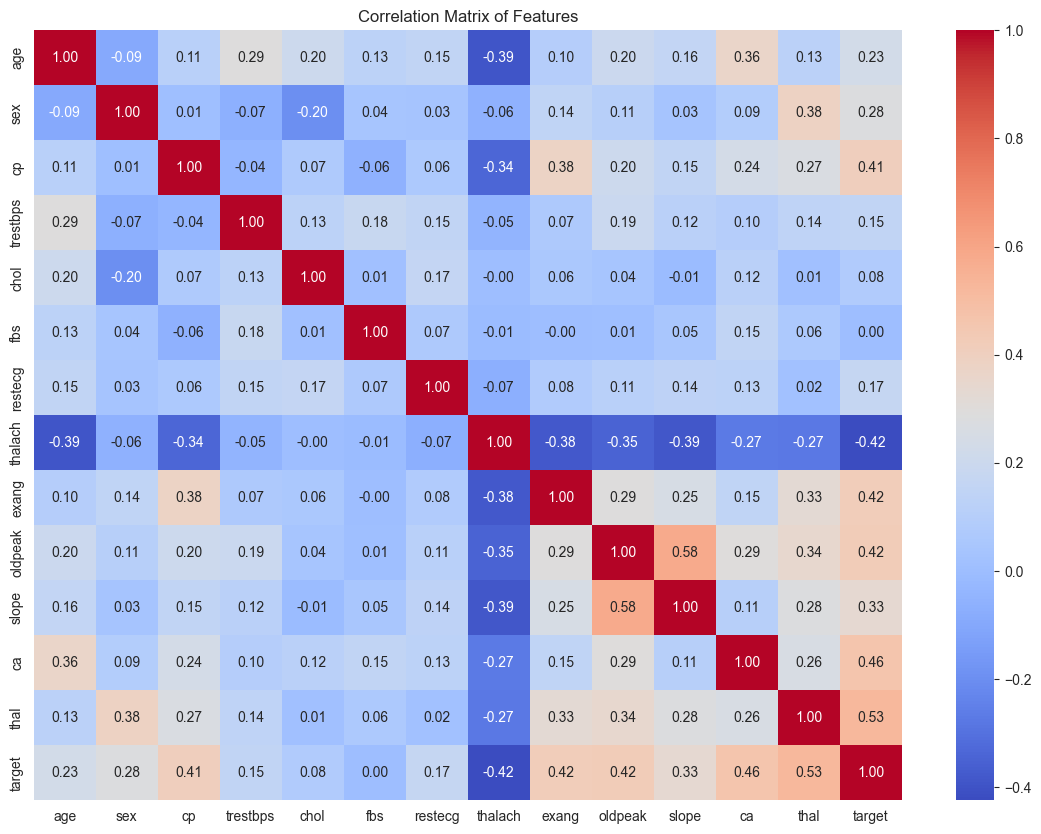

In [8]:
# Plot correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

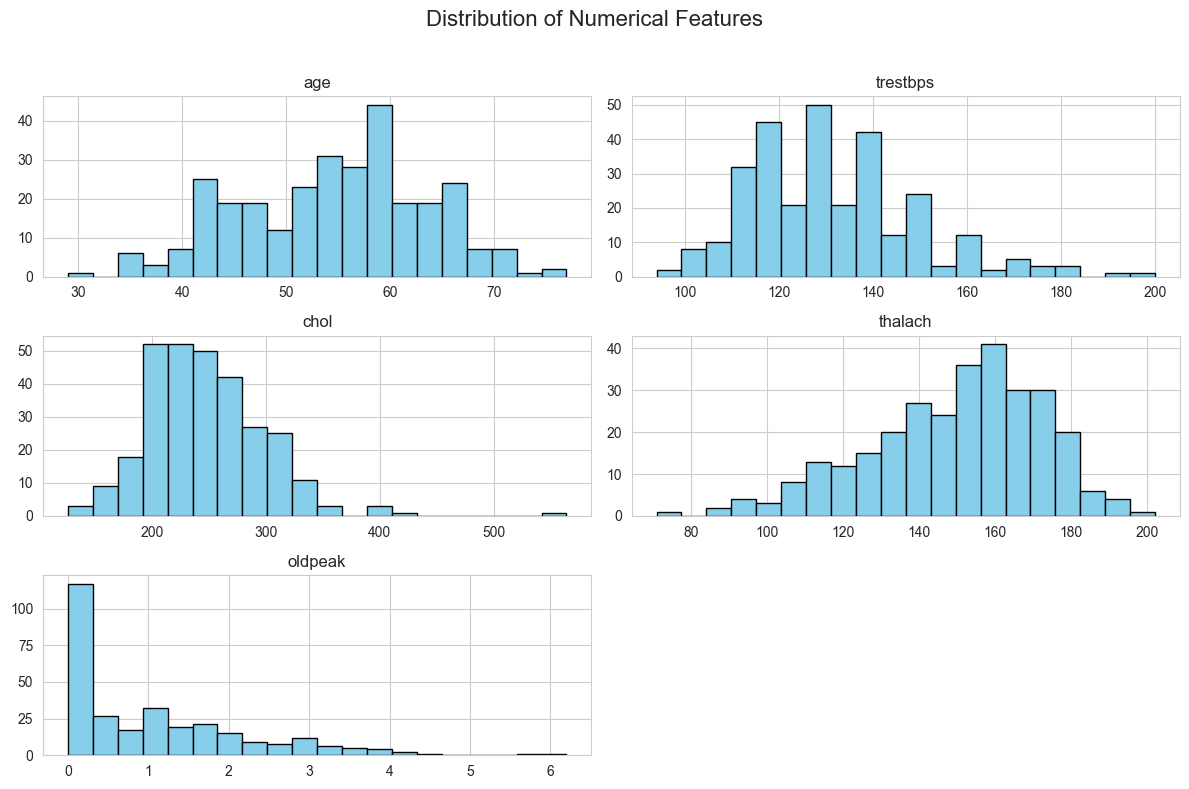

In [9]:
# Plot distributions of numerical features
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[numerical_cols].hist(figsize=(12, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features', size=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Identify categorical and numerical columns
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Apply One-Hot Encoding to categorical features
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Separate features (X) and target (y)
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

# Scale numerical features
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

print("\nFirst 5 rows of the processed features (X):")
print(X.head())

# Save the cleaned and processed data
cleaned_dataset = pd.concat([X, y], axis=1)
# cleaned_dataset.to_csv('heart_disease_cleaned.csv', index=False) # Optional: save to file

print("\nShape of the final processed features:", X.shape)
print("Shape of the target variable:", y.shape)


First 5 rows of the processed features (X):
        age  trestbps      chol   thalach   oldpeak  sex_1.0  cp_2.0  cp_3.0  \
0  0.936181  0.750380 -0.276443  0.017494  1.068965     True   False   False   
1  1.378929  1.596266  0.744555 -1.816334  0.381773     True   False   False   
2  1.378929 -0.659431 -0.353500 -0.899420  1.326662     True   False   False   
3 -1.941680 -0.095506  0.051047  1.633010  2.099753     True   False    True   
4 -1.498933 -0.095506 -0.835103  0.978071  0.295874    False    True   False   

   cp_4.0  fbs_1.0  restecg_1.0  restecg_2.0  exang_1.0  slope_2.0  slope_3.0  \
0   False     True        False         True      False      False       True   
1    True    False        False         True       True       True      False   
2    True    False        False         True       True       True      False   
3   False    False        False        False      False      False       True   
4   False    False        False         True      False      False   

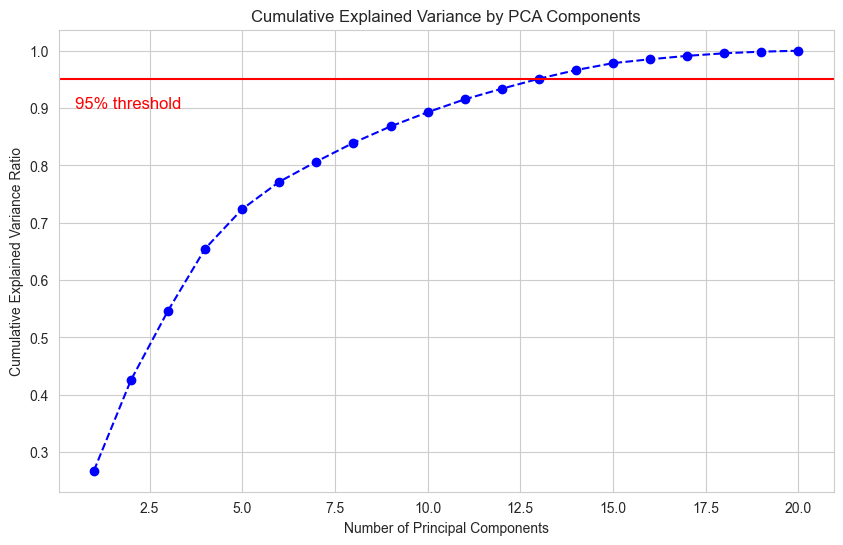

In [11]:
from sklearn.decomposition import PCA

# Apply PCA without specifying the number of components to see the variance ratio
pca = PCA()
X_pca_full = pca.fit(X)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.90, '95% threshold', color = 'red', fontsize=12)
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

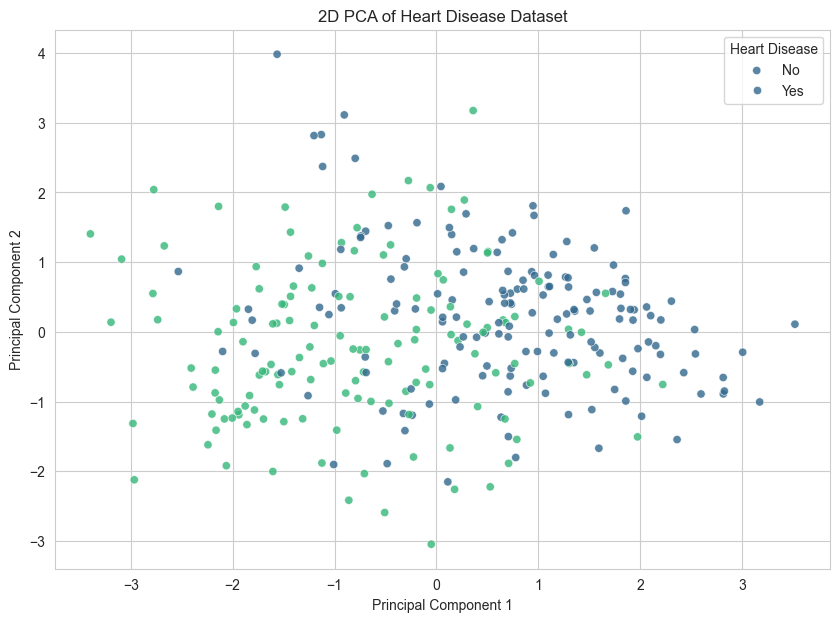

In [12]:
# Apply PCA to reduce data to 2 components for visualization
pca_2 = PCA(n_components=2)
X_pca_2d = pca_2.fit_transform(X)

# Create a DataFrame for the 2D PCA results
pca_df = pd.DataFrame(data=X_pca_2d, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['target'] = y.values # Add target for coloring

# Plot the 2D PCA results
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='Principal Component 1', y='Principal Component 2',
    hue='target',
    data=pca_df,
    palette='viridis',
    alpha=0.8
)
plt.title('2D PCA of Heart Disease Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

C:\Users\youss\AppData\Local\Temp\ipykernel_9436\298531334.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


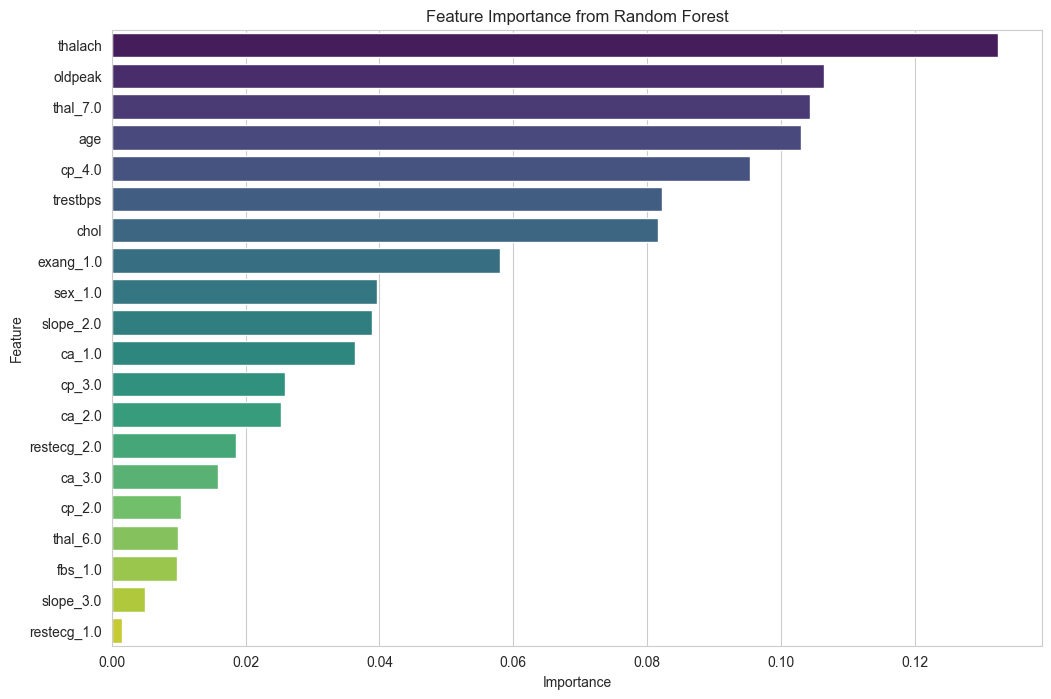

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train a Random Forest model
# We use the pre-scaled and encoded data 'X' and target 'y' from Part 1
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Get feature importances
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.show()

In [14]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize RFE with a Logistic Regression model to select the top 10 features
model = LogisticRegression(solver='liblinear')
rfe = RFE(model, n_features_to_select=10)
rfe = rfe.fit(X, y)

# Get the selected features
selected_features_rfe = X.columns[rfe.support_]

print("Top 10 features selected by RFE:")
print(list(selected_features_rfe))

Top 10 features selected by RFE:
['oldpeak', 'sex_1.0', 'cp_3.0', 'cp_4.0', 'exang_1.0', 'slope_2.0', 'ca_1.0', 'ca_2.0', 'ca_3.0', 'thal_7.0']


In [15]:
# Create the final dataset with the selected features
X_selected = X[selected_features_rfe]

print("\nShape of the dataset after feature selection:", X_selected.shape)
print("First 5 rows of the selected features dataset:")
print(X_selected.head())


Shape of the dataset after feature selection: (297, 10)
First 5 rows of the selected features dataset:
    oldpeak  sex_1.0  cp_3.0  cp_4.0  exang_1.0  slope_2.0  ca_1.0  ca_2.0  \
0  1.068965     True   False   False      False      False   False   False   
1  0.381773     True   False    True       True       True   False   False   
2  1.326662     True   False    True       True       True   False    True   
3  2.099753     True    True   False      False      False   False   False   
4  0.295874    False   False   False      False      False   False   False   

   ca_3.0  thal_7.0  
0   False     False  
1    True     False  
2   False      True  
3   False     False  
4   False     False  


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc

# Split the data using the feature-selected dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (237, 10)
Testing set shape: (60, 10)


In [17]:
# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42) # probability=True for ROC curve
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

--- Logistic Regression ---
Accuracy: 0.8500
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        32
           1       0.91      0.75      0.82        28

    accuracy                           0.85        60
   macro avg       0.86      0.84      0.85        60
weighted avg       0.86      0.85      0.85        60

--- Decision Tree ---
Accuracy: 0.7667
              precision    recall  f1-score   support

           0       0.76      0.81      0.79        32
           1       0.77      0.71      0.74        28

    accuracy                           0.77        60
   macro avg       0.77      0.76      0.76        60
weighted avg       0.77      0.77      0.77        60

--- Random Forest ---
Accuracy: 0.7000
              precision    recall  f1-score   support

           0       0.71      0.75      0.73        32
           1       0.69      0.64      0.67        28

    accuracy                           0.70        60
   ma

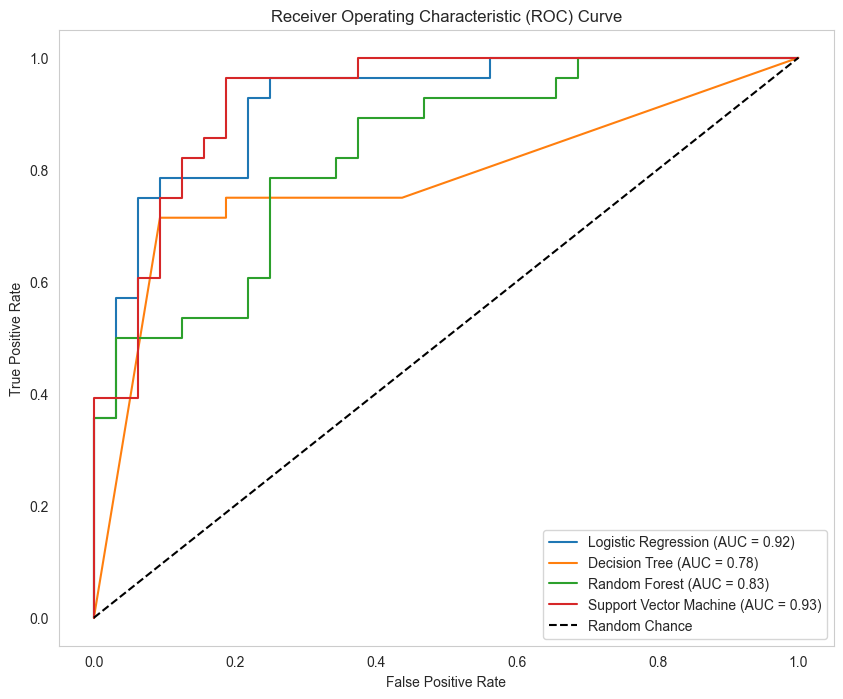

In [18]:
# Plot ROC curves for all models
plt.figure(figsize=(10, 8))

for name, model in models.items():
    # Get prediction probabilities
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Calculate ROC curve values
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Plot
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plotting the baseline
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

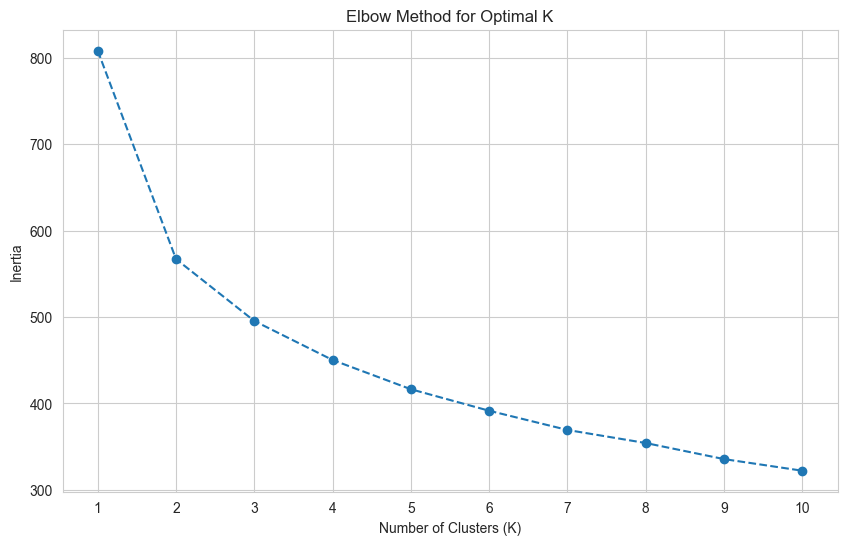

In [19]:
from sklearn.cluster import KMeans

# Calculate inertia for a range of K values
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_selected)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

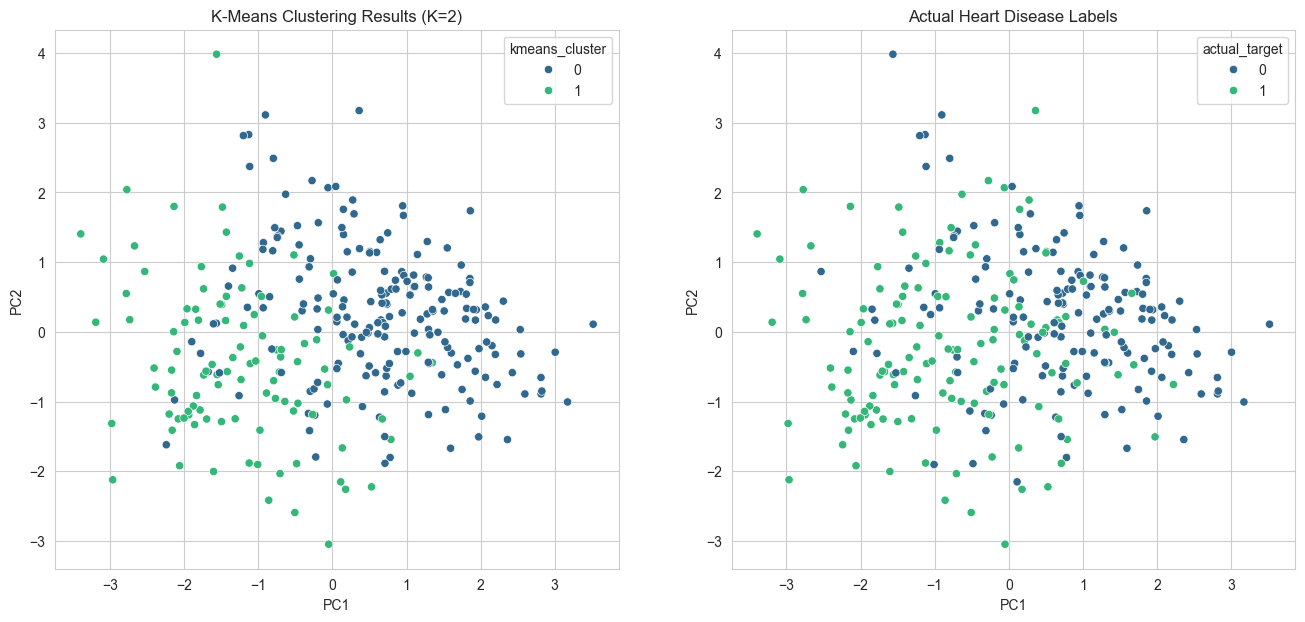

In [20]:
# Apply K-Means with K=2
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_selected)

# For visualization, we use the 2D PCA data generated in Part 2
# Create a DataFrame for plotting
vis_df = pd.DataFrame(data=X_pca_2d, columns=['PC1', 'PC2'])
vis_df['kmeans_cluster'] = kmeans_labels
vis_df['actual_target'] = y.values

# Plot K-Means clusters vs Actual labels
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Plot K-Means Clusters
sns.scatterplot(x='PC1', y='PC2', hue='kmeans_cluster', data=vis_df, palette='viridis', ax=ax1)
ax1.set_title('K-Means Clustering Results (K=2)')

# Plot Actual Labels
sns.scatterplot(x='PC1', y='PC2', hue='actual_target', data=vis_df, palette='viridis', ax=ax2)
ax2.set_title('Actual Heart Disease Labels')

plt.show()

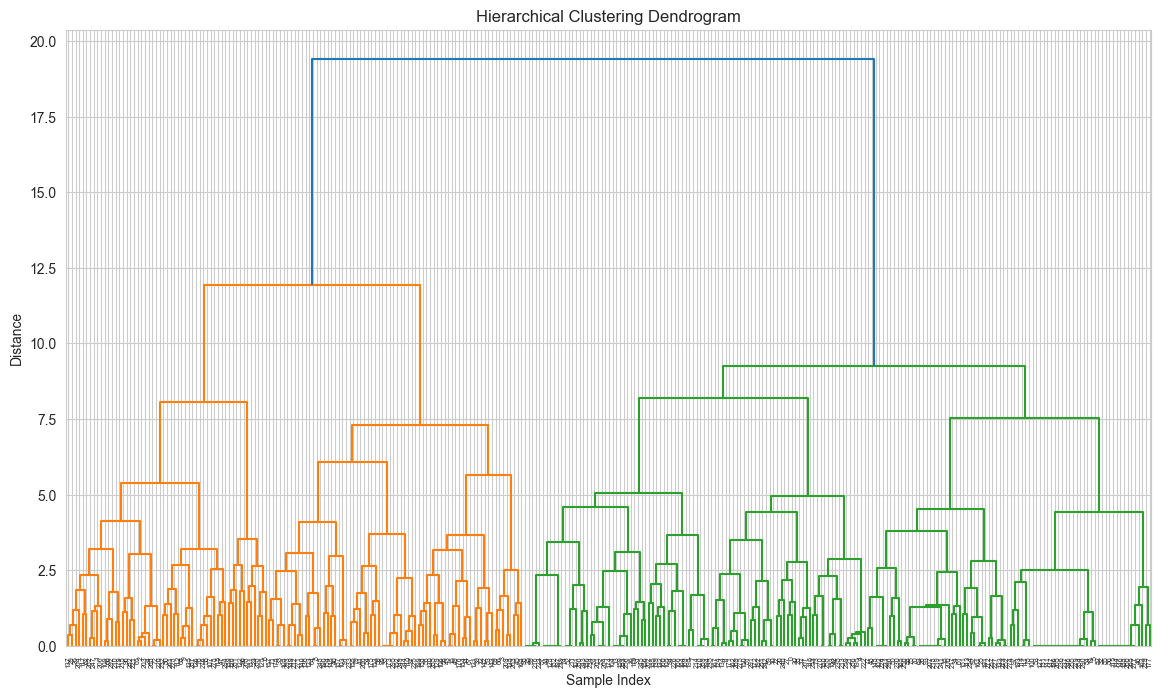

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate the linkage matrix
linked = linkage(X_selected, method='ward')

# Plot the dendrogram
plt.figure(figsize=(14, 8))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

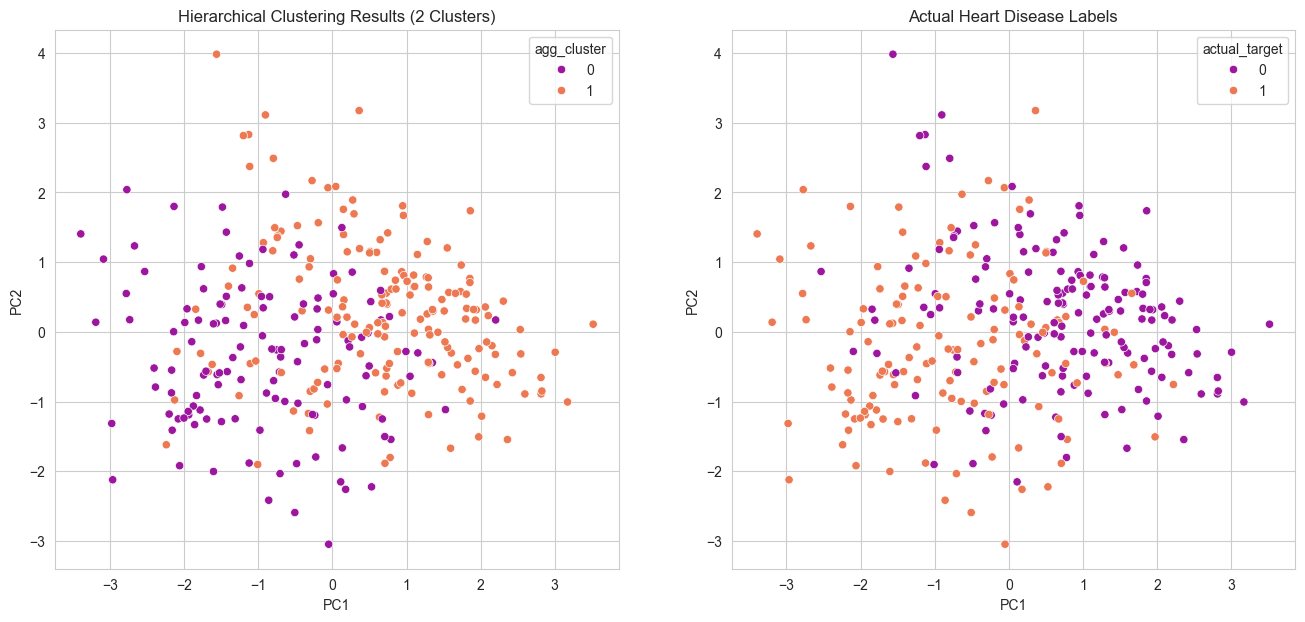

In [22]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
agg_labels = agg_cluster.fit_predict(X_selected)

# Add results to our visualization DataFrame
vis_df['agg_cluster'] = agg_labels

# Plot Hierarchical clusters vs Actual labels
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Plot Hierarchical Clusters
sns.scatterplot(x='PC1', y='PC2', hue='agg_cluster', data=vis_df, palette='plasma', ax=ax1)
ax1.set_title('Hierarchical Clustering Results (2 Clusters)')

# Plot Actual Labels
sns.scatterplot(x='PC1', y='PC2', hue='actual_target', data=vis_df, palette='plasma', ax=ax2)
ax2.set_title('Actual Heart Disease Labels')

plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],       # Number of trees in the forest
    'max_features': ['sqrt', 'log2'],               # Number of features to consider at every split
    'max_depth': [10, 20, 30, None],                # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],                # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],                  # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]                      # Method of selecting samples for training each tree
}

# Use the base Random Forest model
rf = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
# n_iter=100 means it will try 100 different combinations
# cv=5 means 5-fold cross-validation
# n_jobs=-1 uses all available CPU cores to speed up the search
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                               n_iter=100, cv=5, verbose=1, random_state=42, n_jobs=-1)

# Fit the random search model to the training data
rf_random.fit(X_train, y_train)

# Print the best parameters found
print("\nBest Hyperparameters found:")
print(rf_random.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [ ]:
# Get the best estimator
best_rf_model = rf_random.best_estimator_

# Make predictions with the optimized model
y_pred_optimized = best_rf_model.predict(X_test)

# Get the baseline model's predictions (from Part 4)
baseline_rf_model = models['Random Forest']
y_pred_baseline = baseline_rf_model.predict(X_test)

# Compare the classification reports
print("\n--- Baseline Random Forest ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_baseline):.4f}")
print(classification_report(y_test, y_pred_baseline))

print("\n--- Optimized Random Forest ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_optimized):.4f}")
print(classification_report(y_test, y_pred_optimized))

In [ ]:
import joblib

# The optimized model from Part 6
final_model = best_rf_model

# The scaler for numerical features (from Part 1)
# Note: The scaler was fitted on the original numerical columns
# We need to save it to process user input later.
# We also need the list of selected feature columns to ensure order.
model_components = {
    'model': final_model,
    'scaler': scaler,
    'numerical_cols': numerical_cols,
    'selected_cols': list(X_selected.columns)
}

# Save the components to a file
joblib.dump(model_components, 'final_model.pkl')

print("Model and components saved successfully as 'final_model.pkl'")